## 표준 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터셋 로딩
- Raw Data : 정제가 되지 않은 데이터 세트
- 토이 데이터 : 분석에 용이한 형태로 만들어진 연습용 데이터 세트

In [2]:
chipo = pd.read_csv('D:/python3/data/chipotle.tsv', sep = '\t') # csv : ,쉼표로 구분 / tsv : 'tab키'로 구분
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## step1. 기본 정보 탐색

In [3]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [4]:
chipo.shape 

(4622, 5)

#### chipo 데이터셋의 피처(컬럼) 분석
- order_id : 주문번호
- quantity : 주문수량
- item_name : 메뉴명
- choice_description : 토핑(소스 + 토핑)
- item_price : 메뉴가격

### 분석 주제나 목적
1. 가장 많이 판매된 메뉴 Top 10은 무엇인지
2. 음식 메뉴는 총 몇가지 일까?
3. 메뉴별 판매량은 얼마나 될까?
4. 메뉴별 가격대는 얼마일까?
5. 메뉴중 제일 비싼 메뉴는 무엇일까?
6. 어떤 음식 조합이 제일 선호 될까? -> 소스, 토핑 따로 빼내서 처리(정규표현식)- 대괄호 없애기

In [5]:
# 수치형 데이터의 기초 통계량을 분석하는 함수
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### 피처(Feature, Column, Attribute)
1. 수치형 피처 : 연속형(실수형), 비연속형(정수형) -> describe()
2. 범주형 피처(문자형) : 순서가 있는 범주형(학점 등), 순서가 없는 범주형(명목형)(혈액형 등)

In [6]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [7]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [8]:
# order_id를 범주형 데이터로 변형
# astype : 형을 바꾸는 타입, istype : ~형이 맞습니까 True, False 
# casting
chipo['order_id'] = chipo['order_id'].astype(str)
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [9]:
# 범주형 데이터의 개수 확인. unique() = drop + sort, 중복제거와 정렬
# order_id, item_name
# 계수 : len()
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


In [10]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [11]:
# value_counts() : 개별 요소의 건수를 계산하여 변환
len(chipo['item_name'].value_counts())

50

### step2. 인사이트(insight) 발견 : 탐색과 시각화

#### 가장 많이 판매된 메뉴 Top 10

In [12]:
# value_counts() 함수는 오로지 Series 객체에만 적용된다.-> 한테이블에 똑같은 메뉴 5개면 5로 출력
chipo['item_name'].value_counts()[:10]

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [13]:
item_count = chipo['item_name'].value_counts()[:10]
# iteritems -> 키 값                              
# enumerate(array, start-number)                    시작 인덱스 값
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print('Top', idx, ' : ', val, cnt)
    
# 시각화 연습

Top 1  :  Chicken Bowl 726
Top 2  :  Chicken Burrito 553
Top 3  :  Chips and Guacamole 479
Top 4  :  Steak Burrito 368
Top 5  :  Canned Soft Drink 301
Top 6  :  Steak Bowl 211
Top 7  :  Chips 211
Top 8  :  Bottled Water 162
Top 9  :  Chicken Soft Tacos 115
Top 10  :  Chicken Salad Bowl 110


In [14]:
# 위에거랑 동일
item_count.items()

### 메뉴별 주문 계수와 총량

In [15]:
# item_name별 주문 계수
# groupby() : DataFrame.groupby('기준 컬럼명')
#          : Series -> 
order_count = chipo.groupby('item_name')['order_id'].count() # 한테이블에 다 똑같은 메뉴 시키면 1개라고 취급
order_count.head(10)

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [16]:
# item별 주문 총량 : 주문수량의 합계
order_quantity = chipo.groupby('item_name')['quantity'].sum()
order_quantity.head(10)

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [17]:
import platform
from matplotlib import font_manager, rc # parameter 값

if platform.system() == 'Darwin': # apple꺼 (맥캔토시)
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system....')

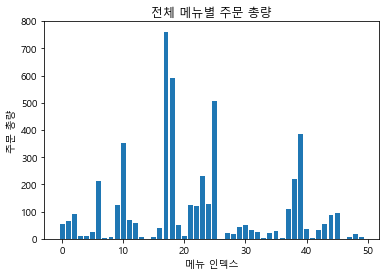

In [18]:
# 주문 총량
# 리스트 타입으로 저장
item_name_list = order_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
y_pos = order_quantity.values.tolist()

plt.bar(x_pos, y_pos)
plt.title('전체 메뉴별 주문 총량')
plt.xlabel('메뉴 인덱스')
plt.ylabel('주문 총량')
plt.show()

## step3. 데이터 전처리 & 데이터 통계분석

In [19]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.6+ KB


In [20]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

#### item_price 자료형을 수치형으로 반환하는 작업

In [21]:
# 택 1 : 1
def func(x):
    return float(x[1:])

In [22]:
# 택 1 : 2
# strip() : 좌우 공백을 제거하는 문자열 관련 함수.
chipo['item_price'] = chipo['item_price'].str.lstrip('$') # 왼쪽에 있는 달러 제거
chipo['item_price'].astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [ ]:
chipo.describe() # 아직 들어 와 있지 않음.

In [21]:
# 택 1 : 3
# 익명의 함수 lambda 입력 : 출력
# apply(함수) : 반복적으로 수행하는 작업
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [22]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [25]:
# 메뉴별 평균 금액 => 제일 비싼 메뉴와 평균가격을 파악할 수 있다.
chipo_cost = chipo.groupby('item_name')['item_price'].mean() # 가격의 평균
chipo_cost.sort_values(ascending = False)

item_name
Bowl                                     14.800000
Steak Salad Bowl                         11.847931
Chicken Salad Bowl                       11.170455
Carnitas Crispy Tacos                    11.137143
Carnitas Salad Bowl                      11.056667
Barbacoa Crispy Tacos                    10.928182
Carnitas Bowl                            10.833971
Steak Bowl                               10.711801
Barbacoa Salad Bowl                      10.640000
Veggie Soft Tacos                        10.565714
Steak Burrito                            10.465842
Veggie Bowl                              10.211647
Steak Crispy Tacos                       10.209714
Barbacoa Bowl                            10.187273
Veggie Salad Bowl                        10.138889
Carnitas Burrito                         10.132712
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos                     10.045319
Barbacoa Soft Tacos  

### 가장 많이 선호하는 메뉴는 무엇인가?

In [23]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [43]:
print(type(chipo))

<class 'NoneType'>


In [31]:
# 메뉴 순위체크 - 메뉴주문수량 순위체크
# 주로 많이 먹는 메뉴명
# 메뉴별 인기있는 선택옵션
# 실행 X
chipo = chipo.drop(['order_id', 'item_price'], axis = 'columns', inplace = True)
chipo # 이미 제거 후 다시 실행 해서 에러가 뜸.

AttributeError: 'NoneType' object has no attribute 'drop'

In [32]:
chipo.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [24]:
# choice_description 결측처리 : Origin
chipo['choice_description'].fillna('Origin', inplace = True)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Origin,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Origin,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### choice_description 피처 
- [[소스],[토핑]] X => [소스,[토핑]]
- 두 개의 열로 쪼개는 작업 : source, topping

In [25]:
type(chipo['choice_description'])

pandas.core.series.Series

In [26]:
# 정규 표현식 사용 -> 영문자와 ',' 놔두기 ,=> 나중에 이것으로 나눌것이다.
# 파이썬 정규표현식 모듈
import re
num = 0
for i in chipo['choice_description']:
    # 패턴[^a-zA-z, ] : 알파벳과 ',' 그리고 공백을 제외하고 모두 지우겠다는 의미
    chipo['choice_description'][num] = re.sub(pattern='[^a-zA-z, ]', repl = '', string = i)
    num += 1

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


1. list => Dataframe
2. Series => DataFrame : Series객체.to_frame()
3. DataFrame 칼럼 추가 / 삭제

In [27]:
# 주문당 평균 계산금액을 추출하기
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Origin,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Origin,2.39
4,2,2,Chicken Bowl,"[TomatilloRed Chili Salsa Hot, [Black Beans, R...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa Mild, [Rice, Cheese, Sour ...",10.98
6,3,1,Side of Chips,Origin,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [28]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [30]:
chipo.groupby('order_id')['item_price'].sum().describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [31]:
# 한 주문에 10달러 이상 지출한 주문번호를 추출하시오.
# step1. 주문번호별 주문금액의 합계
chipo_orderid_group = chipo.groupby('order_id')['item_price'].sum()
# step2. 금액에서 10달러 이상인 자료만 추출
type(chipo_orderid_group)

pandas.core.series.Series

In [32]:
result = chipo_orderid_group[chipo_orderid_group >= 10]
result[:10]

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
1002    10.68
1003    13.00
1004    21.96
1005    12.15
1006    71.40
Name: item_price, dtype: float64

### 메뉴별 가격 구하기 ( 완벽하게 알아 낼 수 없다 )

In [33]:
# 수량이 1개인 제품만 골라낸다.
chipo_one_item = chipo[chipo.quantity == 1]
# 메뉴별 금액이 가장 작은 값을 추출
chipo_per_item = chipo_one_item.groupby('item_name').min()
chipo_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato Mild, [Lettuce, Black Beans, Rice]]",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato Mild, [Black Beans, Rice, Sour C...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,Origin,1.09
Bowl,279,1,"[AdoboMarinated and Grilled Steak, [Sour Cream...",7.40
Burrito,214,1,"[AdoboMarinated and Grilled Chicken, Pinto Bea...",7.40
